In [2]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.signal as spg
import scipy.constants as const
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 15

## COMSOL Data

In [3]:
Q5to11 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/initial_data/Qfac_eigensweep_5to11GHz.csv', skiprows=4)
Q1to5 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/initial_data/Qfac_eigensweep_1to5GHz.csv', skiprows=4)

In [63]:
# for 1 to 5 GHz

# clean up work for TE doubles in Q1to5
Q1to5['Freq rounded'] = Q1to5['Frequency (GHz)'].round(5)
# Step 3: Drop duplicates, keeping the first occurrence
Qfac1to5 = Q1to5.drop_duplicates(subset='Freq rounded', keep='first')
#Q5to11['Freq rounded'] = Q5to11['Frequency GHz'].round(6)
Qfac1to5 = Qfac1to5[Qfac1to5['Freq rounded'].round(2) != 3.65]

Q_peaks1, _1 = spg.find_peaks(Qfac1to5['Quality factor (1)'])
Q_peak_freqs1 = Qfac1to5['Frequency (GHz)'].iloc[Q_peaks1]
Q_peak_Qs1 = Qfac1to5['Quality factor (1)'].iloc[Q_peaks1]
Q_cfs1 = Qfac1to5['% search_freq (Hz)'].iloc[Q_peaks1]
peak_dict1 = {'cf': Q_cfs1, 'freqs': Q_peak_freqs1, 'Q': Q_peak_Qs1}
peaks1 = pd.DataFrame(peak_dict1).sort_values('Q', ascending=False).reset_index(inplace=False)
top_peaks1 = peaks1.iloc[0:10]

In [65]:
# for 5 to 11 GHz
# clean up work for TE doubles in Q1to5
Q5to11['Freq rounded'] = Q5to11['Frequency (GHz)'].round(5)
# Step 3: Drop duplicates, keeping the first occurrence
Qfac5to11 = Q5to11.drop_duplicates(subset='Freq rounded', keep='first')

Q_peaks, _ = spg.find_peaks(Qfac5to11['Quality factor (1)'])
Q_peak_freqs = Qfac5to11['Frequency (GHz)'].iloc[Q_peaks]
Q_peak_Qs = Qfac5to11['Quality factor (1)'].iloc[Q_peaks]
peak_dict = {'freqs': Q_peak_freqs, 'Q': Q_peak_Qs}
peaks = pd.DataFrame(peak_dict).sort_values('Q', ascending=False).reset_index(inplace=False)
top_peaks = peaks.iloc[0:10]

In [67]:
# for combined 
Q1to11 = pd.concat([Qfac1to5, Qfac5to11])
Q_peaks_all, _ = spg.find_peaks(Q1to11['Quality factor (1)'])
Q_peak_freqs_all = Q1to11['Frequency (GHz)'].iloc[Q_peaks_all]
Q_peak_Qs_all = Q1to11['Quality factor (1)'].iloc[Q_peaks_all]
peak_dict_all = {'freqs': Q_peak_freqs_all, 'Q': Q_peak_Qs_all}
peaks_all = pd.DataFrame(peak_dict_all).sort_values('Q', ascending=False).reset_index(inplace=False)
top_peaks_all = peaks_all.iloc[0:20]

In [68]:
def plot_Qvfreq(df):
    plt.plot(df['Frequency (GHz)'], df['Quality factor (1)'])
    plt.xlabel('Freq (GHz)')
    plt.ylabel('Q factor')
    plt.title('Q Factor vs. Eigenfrequency')

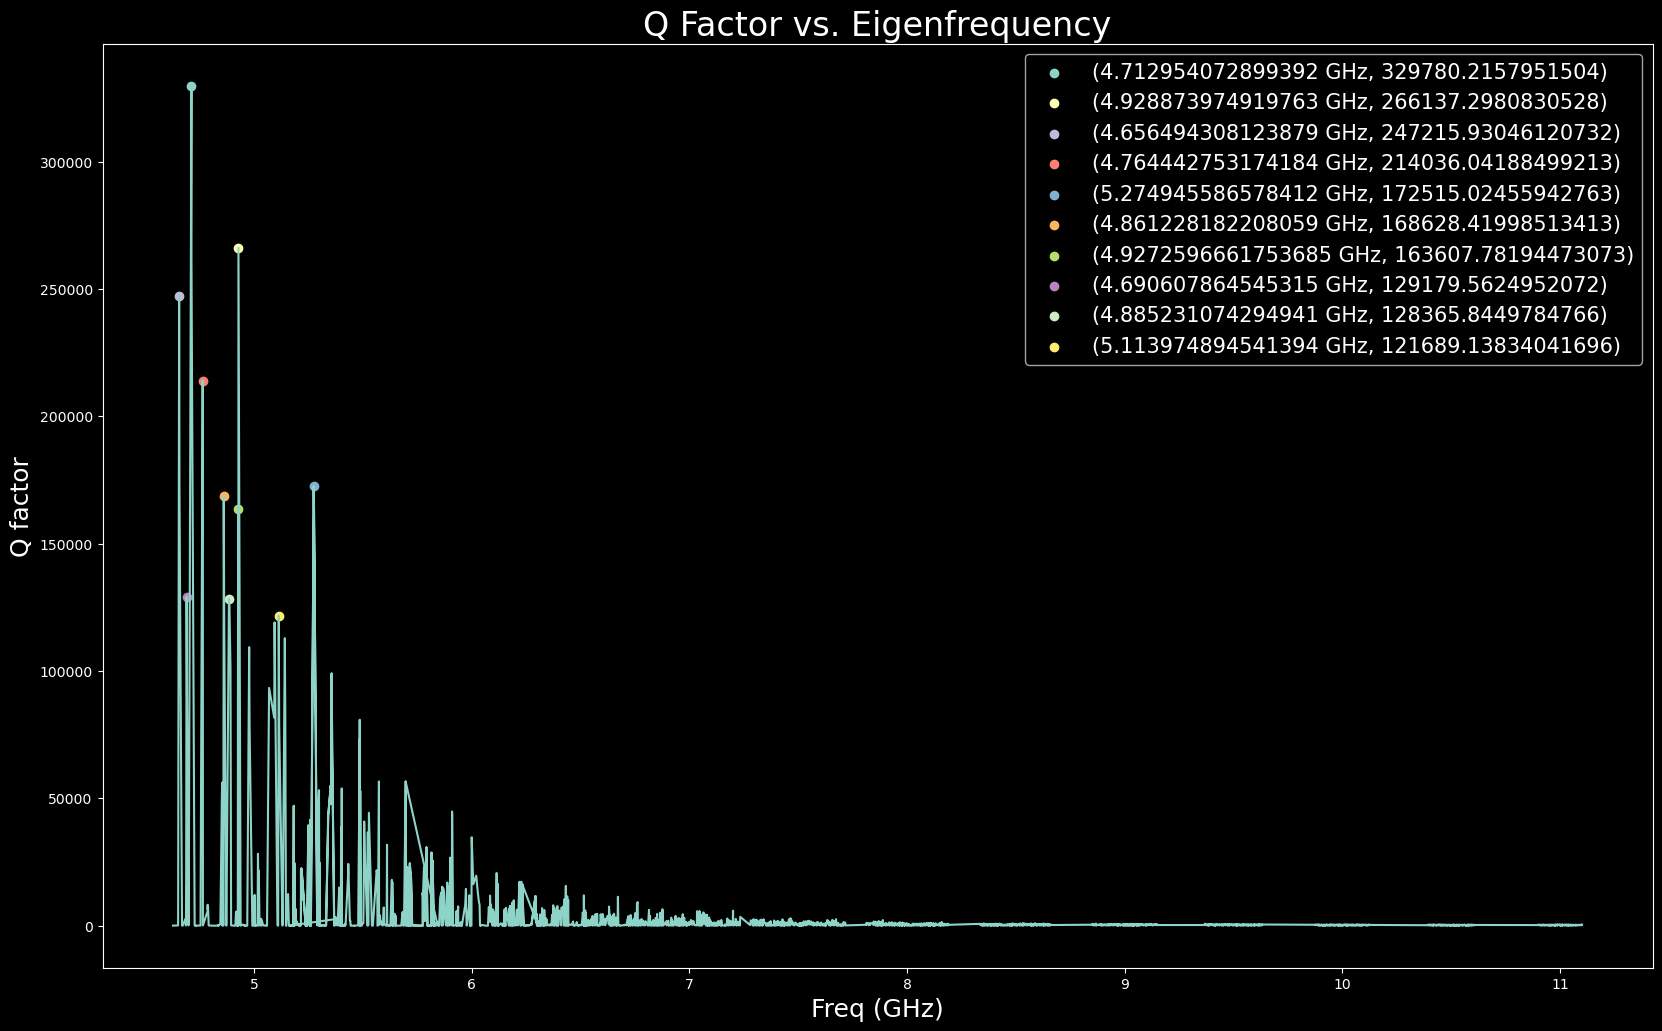

In [69]:
plt.figure(figsize = (20,12))
plot_Qvfreq(Q5to11)
for i in range(len(top_peaks)):
    plt.scatter(top_peaks['freqs'].loc[i], top_peaks['Q'].loc[i], 
                label = f'({top_peaks["freqs"][i]} GHz, {top_peaks["Q"][i]})')
plt.legend()

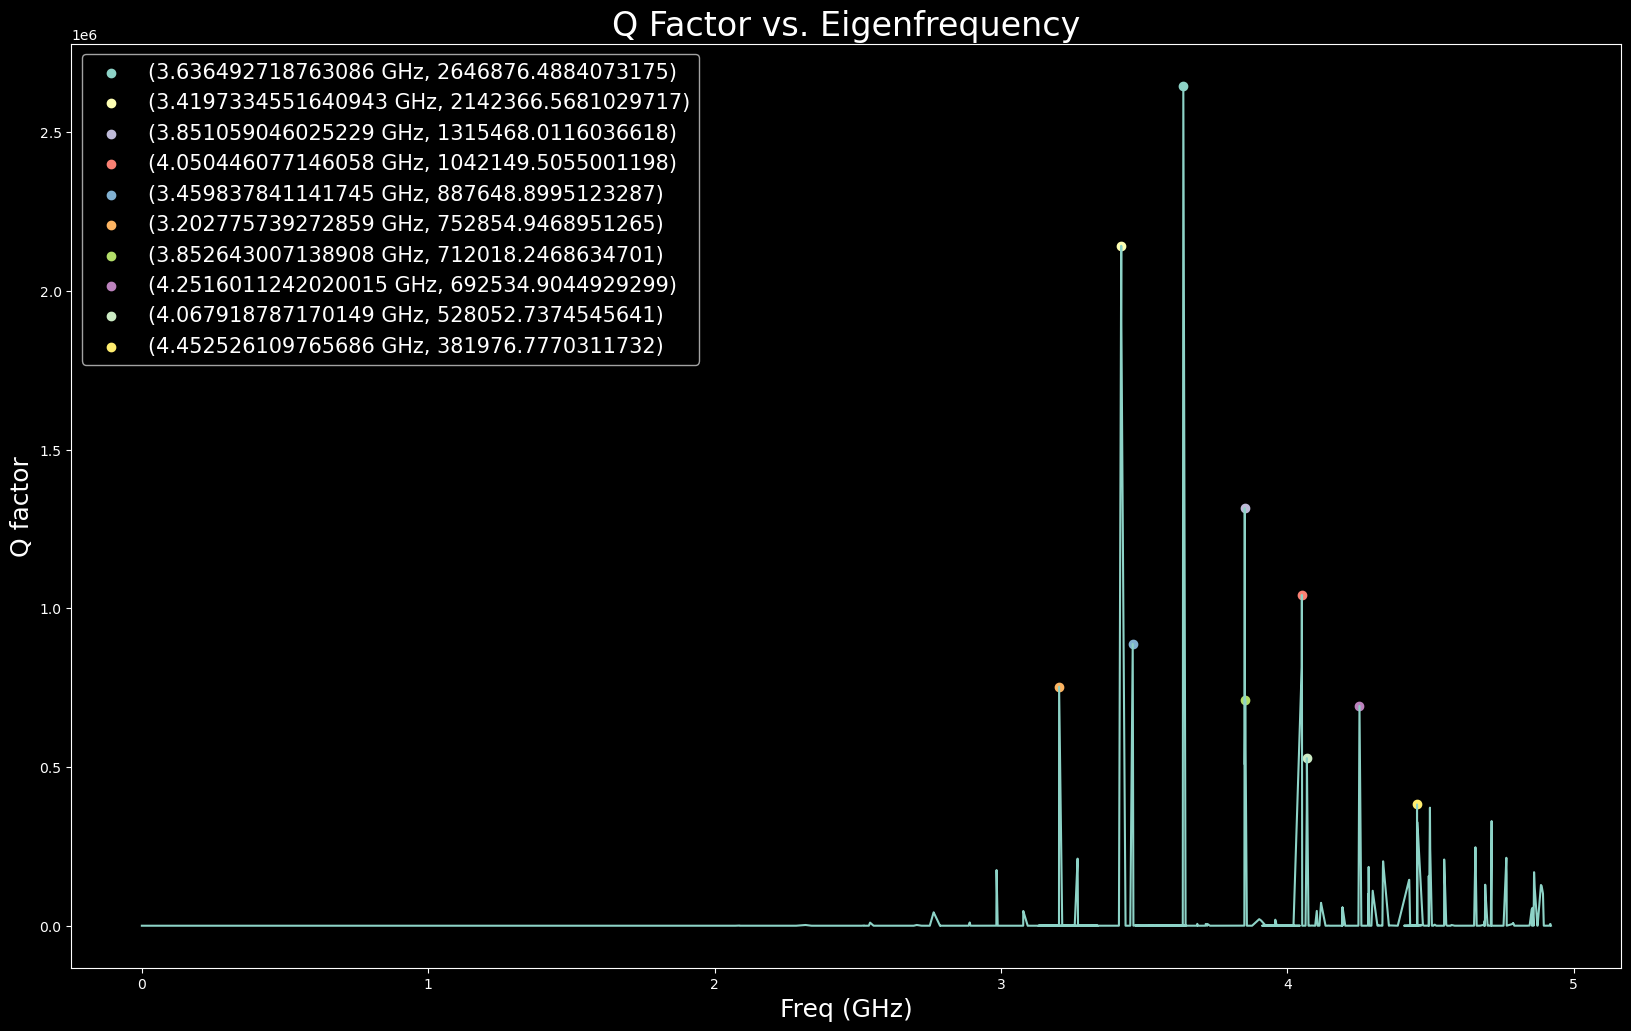

In [70]:
plt.figure(figsize = (20,12))
plot_Qvfreq(Qfac1to5)
for i in range(len(top_peaks1)):
    plt.scatter(top_peaks1['freqs'].loc[i], top_peaks1['Q'].loc[i], 
                label = f'({top_peaks1["freqs"][i]} GHz, {top_peaks1["Q"][i]})')
plt.legend()

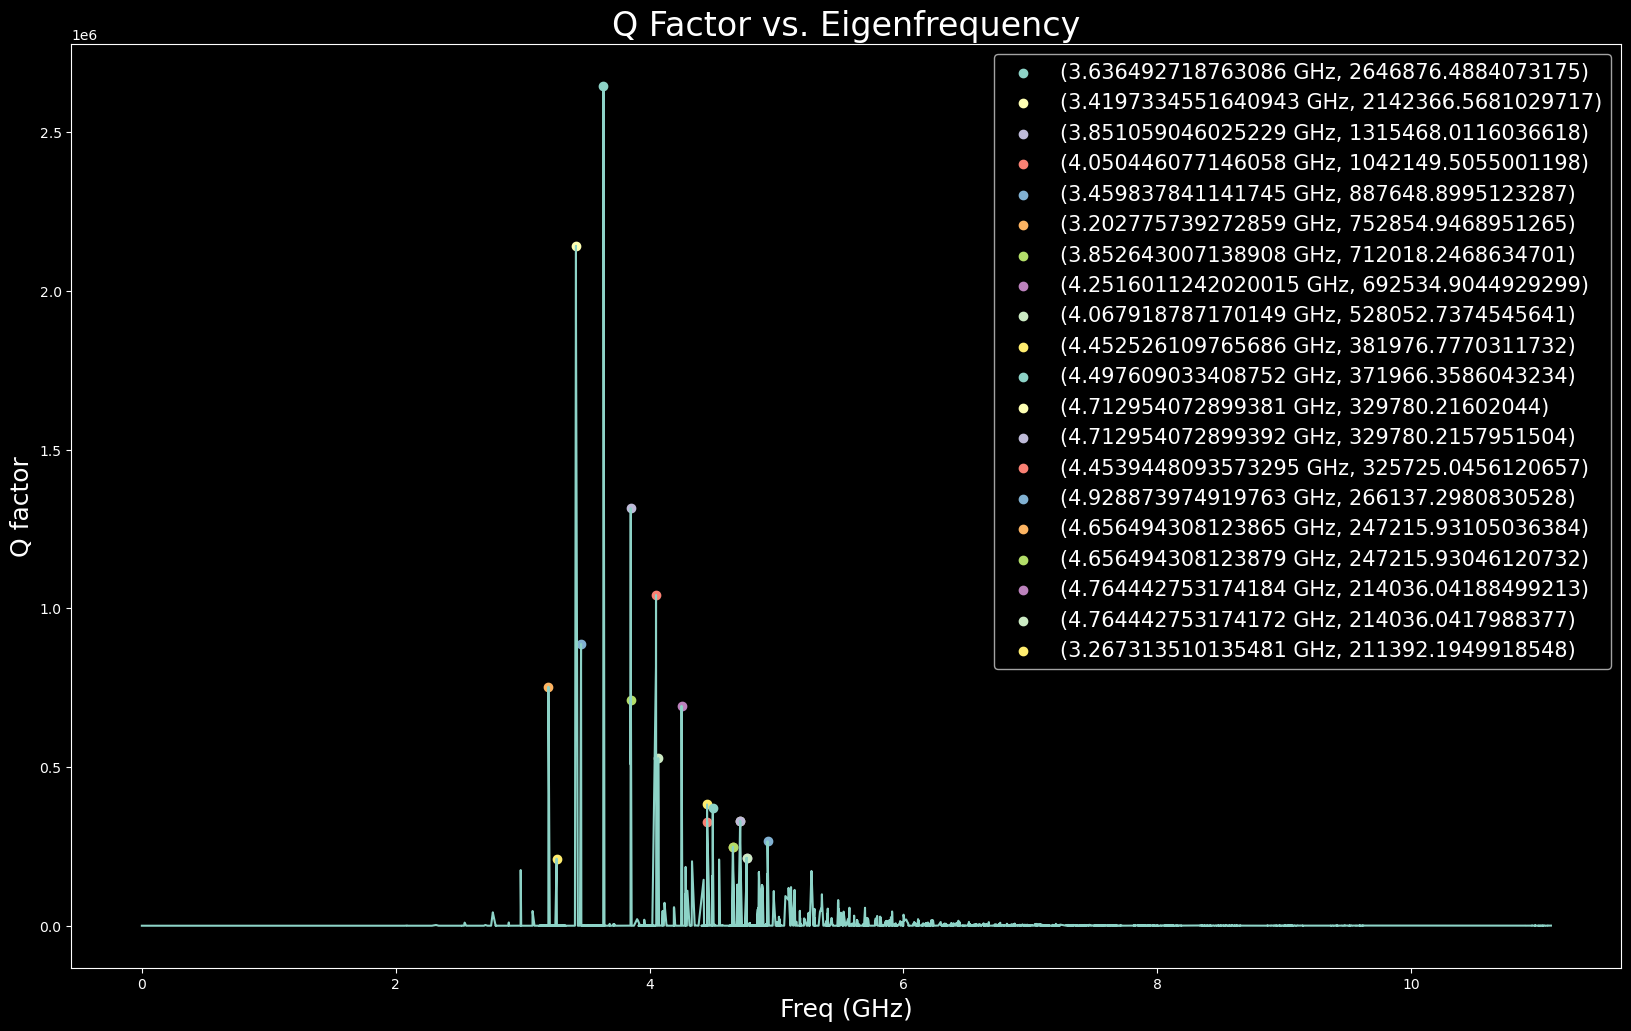

In [71]:
plt.figure(figsize = (20,12))
plot_Qvfreq(Q1to11)
for i in range(len(top_peaks_all)):
    plt.scatter(top_peaks_all['freqs'].loc[i], top_peaks_all['Q'].loc[i], 
                label = f'({top_peaks_all["freqs"][i]} GHz, {top_peaks_all["Q"][i]})')
plt.legend()

## VNA Data

In [73]:
import VNA_data_read_local as vdr

In [78]:
test = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/broadband_051625/disk_1601_PWR-15to5_closer2_2025-05-16_13-36-23.txt')

In [86]:
def single_loader(path): 
    #folder_path = '/Users/FTS/Desktop/whispering_gallery/'
    data = pd.read_csv(path)
    data['Complex (decimal)'] = data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    return data

In [89]:
BL_3p96_4p92 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_3.96to4.92GHz_-15to5dB_1601_2025-05-16_16-26-52.txt')
BL_4p92_6p04 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_4.92to6.04GHz_-15to5dB_1601_2025-05-16_16-28-35.txt')
BL_6p04_7p0 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_6.04to7GHz_-15to5dB_1601_2025-05-16_16-30-10.txt')
BL_7p0_7p96 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_7to7.96GHz_-15to5dB_1601_2025-05-16_16-31-21.txt')
BL_7p96_9p08 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_7.96to9.08GHz_-15to5dB_1601_2025-05-16_16-33-59.txt')
BL_9p08_9p88 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/BL_Narrow_9.08to9.88GHz_-15to5dB_1601_2025-05-16_16-35-32.txt')

disk_3p96_4p92 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_3.96to4.92GHz_-15to5dB_1601_2025-05-16_16-24-48.txt')
disk_4p92_6p04 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_4.92to6.04GHz_-15to5dB_1601_2025-05-16_16-22-45.txt')
disk_6p04_7p0 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_6.04to7GHz_-15to5dB_1601_2025-05-16_16-15-24.txt')
disk_7p0_7p96 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_7to7.96GHz_-15to5dB_1601_2025-05-16_16-16-55.txt')
disk_7p96_9p08 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_7.96to9.08GHz_-15to5dB_1601_2025-05-16_16-18-22.txt')
disk_9p08_9p88 = single_loader('/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/data/DISK_Narrow_9.08to9.88GHz_-15to5dB_1601_2025-05-16_16-20-13.txt')

BL_concat = pd.concat([BL_3p96_4p92, BL_4p92_6p04, BL_6p04_7p0, BL_7p0_7p96, BL_7p0_7p96, BL_7p96_9p08, BL_9p08_9p88]).drop_duplicates(subset=['Freq (Hz)'])
disk_concat = pd.concat([disk_3p96_4p92, disk_4p92_6p04, disk_6p04_7p0, disk_7p0_7p96, disk_7p0_7p96, disk_7p96_9p08, disk_9p08_9p88]).drop_duplicates(subset=['Freq (Hz)'])

In [84]:
def load_plot_subtracted(baseline_filename, disk_res_filename, folder):
    folder_path = '/Users/leayamashiro/whispering_gallery_MAIN/whispering_gallery/' + folder + '/'
    baseline_data = pd.read_csv(folder_path + baseline_filename)
    baseline_data['Complex (decimal)'] = baseline_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)
    disk_resonance_data = pd.read_csv(folder_path + disk_res_filename)
    disk_resonance_data['Complex (decimal)'] = disk_resonance_data['Complex (decimal)'].str.replace(r'[()]', '', regex=True).apply(complex)

    fig, ax = plt.subplots(1,1, figsize = (10,7))
               
    ax.set_title('S21, Baseline Subtracted')
    ax.plot(1e-9*baseline_data['Freq (Hz)'], 
                20*np.log10(np.abs(disk_resonance_data['Complex (decimal)']))-20*np.log10(np.abs(baseline_data['Complex (decimal)'])), 
               label = '(disk + strip) - baseline', color = 'orange')
    ax.legend()
    plt.setp(ax, xlabel = 'Freq (GHz)', ylabel = 'S21 (dB)')

[Text(0.5, 0, 'Freq (GHz)'), Text(0, 0.5, 'S21 (dB)')]

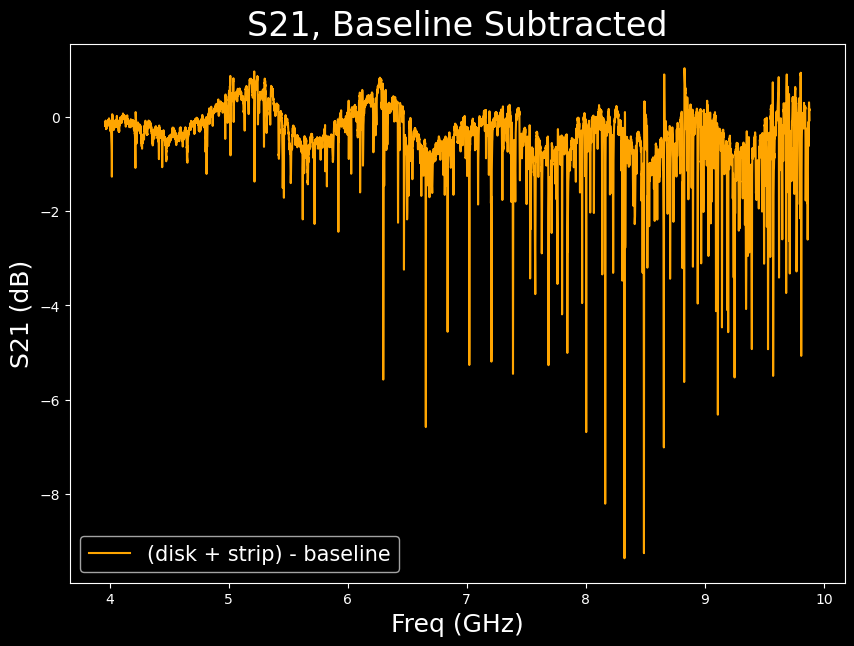

In [90]:
fig, ax = plt.subplots(1,1, figsize = (10,7))
            
ax.set_title('S21, Baseline Subtracted')
ax.plot(1e-9*BL_concat['Freq (Hz)'], 
            20*np.log10(np.abs(disk_concat['Complex (decimal)']))-20*np.log10(np.abs(BL_concat['Complex (decimal)'])), 
        label = '(disk + strip) - baseline', color = 'orange')
ax.legend()
plt.setp(ax, xlabel = 'Freq (GHz)', ylabel = 'S21 (dB)')

[Text(0.5, 0, 'Freq (GHz)'), Text(0, 0.5, 'S21 (dB)')]

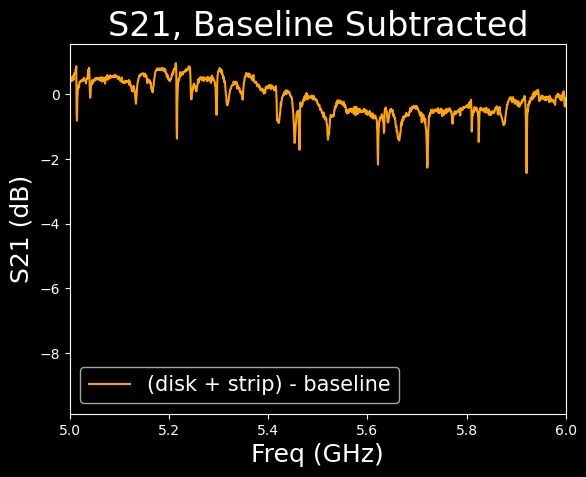

In [104]:
fig, ax = plt.subplots(1)
ax.set_title('S21, Baseline Subtracted')
ax.plot(1e-9*BL_concat['Freq (Hz)'], 
            20*np.log10(np.abs(disk_concat['Complex (decimal)']))-20*np.log10(np.abs(BL_concat['Complex (decimal)'])), 
        label = '(disk + strip) - baseline', color = 'orange')
ax.legend()
ax.set_xlim(5, 6)
plt.setp(ax, xlabel = 'Freq (GHz)', ylabel = 'S21 (dB)')


In [114]:
Q5to7 = Q5to11[(Q5to11['Frequency (GHz)']>=5) & (Q5to11['Frequency (GHz)']<=7)]
BL5to6 = BL_concat[(BL_concat['Freq (Hz)']>=5) & (BL_concat['Freq (Hz)']<=7)]
disk5to6 = disk_concat[(disk_concat['Freq (Hz)']>=5) & (disk_concat['Freq (Hz)']<=7)]

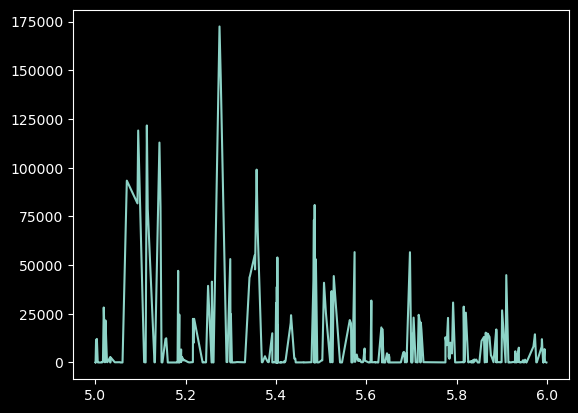

In [96]:
plt.plot(Q5to6['Frequency (GHz)'], Q5to6['Quality factor (1)']/1e6-12)

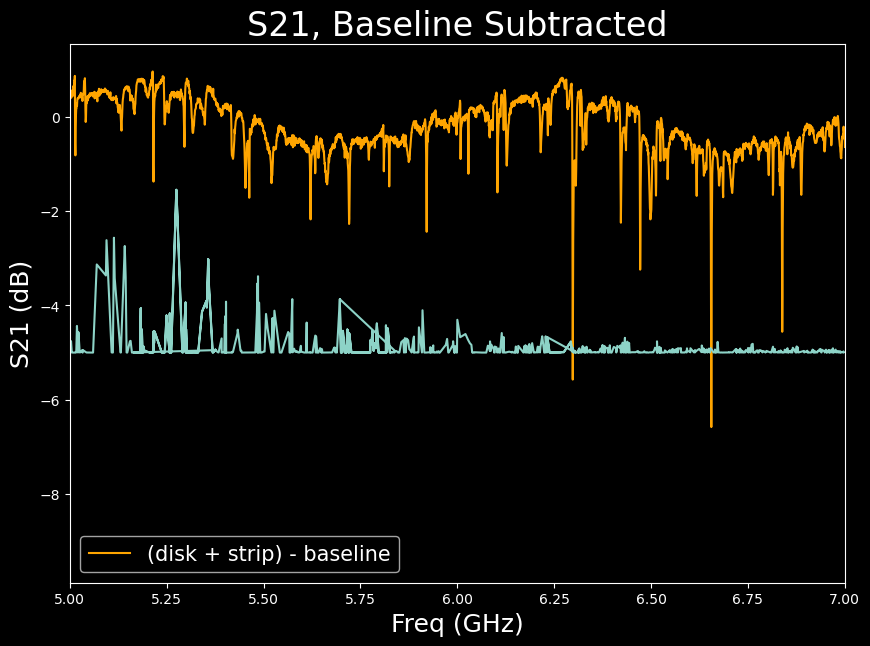

In [123]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.set_title('S21, Baseline Subtracted')
ax.plot(1e-9*BL_concat['Freq (Hz)'], 
            20*np.log10(np.abs(disk_concat['Complex (decimal)']))-20*np.log10(np.abs(BL_concat['Complex (decimal)'])), 
        label = '(disk + strip) - baseline', color = 'orange')
ax.set_xlim(5, 7)
ax.plot(Q5to7['Frequency (GHz)'], Q5to7['Quality factor (1)']/5e4-5)
plt.setp(ax, xlabel = 'Freq (GHz)', ylabel = 'S21 (dB)')
ax.legend()

